In [1]:
import serial
import matplotlib.pyplot as plt
import time

# --- Configuration ---
ARDUINO_PORT = 'COM6'  # <<< IMPORTANT: Change this to your Arduino's serial port!
BAUD_RATE = 9600
TIMEOUT = 5            # Serial read timeout in seconds

# --- Data storage ---
pwm_values = []
rpm_values = []

print(f"Connecting to Arduino on {ARDUINO_PORT} at {BAUD_RATE} baud...")

try:
    # Open serial connection
    ser = serial.Serial(ARDUINO_PORT, BAUD_RATE, timeout=TIMEOUT)
    time.sleep(2)  # Give some time for the serial connection to establish

    print("Connection established. Waiting for data...")

    # Read the header line from Arduino ("PWM,RPM")
    header = ser.readline().decode('utf-8').strip()
    if header == "PWM,RPM":
        print("Received header:", header)
    else:
        print(f"Warning: Expected 'PWM,RPM' header, but got '{header}'")

    # Read data until "Characterization Complete" is received
    while True:
        line = ser.readline().decode('utf-8').strip()
        if not line:
            print("No data received for a while. Is Arduino sending data?")
            continue

        print(f"Received: {line}") # Print raw line for debugging

        if "Characterization Complete" in line:
            print("Characterization complete message received. Stopping data collection.")
            break
        elif "Applying PWM:" in line:
            # This is an informational line, skip it for data parsing
            continue

        try:
            # Parse PWM and RPM values
            pwm_str, rpm_str = line.split(',')
            pwm = int(pwm_str)
            rpm = float(rpm_str)

            # Store data
            pwm_values.append(pwm)
            rpm_values.append(rpm)

        except ValueError as e:
            print(f"Error parsing line: '{line}' - {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

except serial.SerialException as e:
    print(f"Could not open serial port {ARDUINO_PORT}: {e}")
    print("Please check if the Arduino is connected and the correct port is selected.")
    print("Also, ensure the Arduino Serial Monitor is CLOSED.")
except KeyboardInterrupt:
    print("Data collection interrupted by user.")
finally:
    if 'ser' in locals() and ser.is_open:
        ser.close()
        print("Serial port closed.")

# --- Plotting the data ---
if pwm_values and rpm_values:
    plt.figure(figsize=(10, 6))
    plt.plot(pwm_values, rpm_values, marker='o', linestyle='-', color='blue')
    plt.title('Motor RPM vs. PWM Characterization (Right Motor)')
    plt.xlabel('PWM Value (0-255)')
    plt.ylabel('RPM (Revolutions Per Minute)')
    plt.grid(True)
    plt.axvline(x=0, color='gray', linestyle='--', linewidth=0.8) # Show 0 PWM
    plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.8) # Show 0 RPM
    plt.xlim(0, 255) # PWM range
    plt.ylim(bottom=0) # RPM starts from 0

    # Highlight the deadband if RPM is 0 for initial PWM values
    deadband_pwm_end = 0
    for i in range(len(rpm_values)):
        if rpm_values[i] == 0:
            deadband_pwm_end = pwm_values[i]
        else:
            break
    if deadband_pwm_end > 0:
        plt.axvspan(0, deadband_pwm_end, color='red', alpha=0.2, label='Deadband')
        plt.legend()


    plt.show()
else:
    print("No data collected to plot.")

Connecting to Arduino on COM6 at 9600 baud...
Connection established. Waiting for data...
Received: Target Left RPM: 75.00
Error parsing line: 'Target Left RPM: 75.00' - not enough values to unpack (expected 2, got 1)
Received: ----------------------------------------
Error parsing line: '----------------------------------------' - not enough values to unpack (expected 2, got 1)
Received: WARNING: PID loop updates every 1 second. Control may be sluggish.
Error parsing line: 'WARNING: PID loop updates every 1 second. Control may be sluggish.' - not enough values to unpack (expected 2, got 1)
Received: Controlling the LEFT Motor with Feedforward.
Error parsing line: 'Controlling the LEFT Motor with Feedforward.' - not enough values to unpack (expected 2, got 1)
Received: MIN_EFFECTIVE_PWM set to: 60
Error parsing line: 'MIN_EFFECTIVE_PWM set to: 60' - not enough values to unpack (expected 2, got 1)
Received: Target RPM: 75.00 | Current RPM (Left): 3.09 | Error: 71.91 | Base PWM: 134.76 |

Received: Target RPM: 75.00 | Current RPM (Left): 93.75 | Error: -18.75 | Base PWM: 134.76 | Final PWM (Left): 82
Error parsing line: 'Target RPM: 75.00 | Current RPM (Left): 93.75 | Error: -18.75 | Base PWM: 134.76 | Final PWM (Left): 82' - not enough values to unpack (expected 2, got 1)
Received: Target RPM: 75.00 | Current RPM (Left): 75.00 | Error: 0.00 | Base PWM: 134.76 | Final PWM (Left): 129
Error parsing line: 'Target RPM: 75.00 | Current RPM (Left): 75.00 | Error: 0.00 | Base PWM: 134.76 | Final PWM (Left): 129' - not enough values to unpack (expected 2, got 1)
Received: Target RPM: 75.00 | Current RPM (Left): 56.25 | Error: 18.75 | Base PWM: 134.76 | Final PWM (Left): 177
Error parsing line: 'Target RPM: 75.00 | Current RPM (Left): 56.25 | Error: 18.75 | Base PWM: 134.76 | Final PWM (Left): 177' - not enough values to unpack (expected 2, got 1)
Received: Target RPM: 75.00 | Current RPM (Left): 93.75 | Error: -18.75 | Base PWM: 134.76 | Final PWM (Left): 82
Error parsing line

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 3: invalid continuation byte

In [5]:
import pandas as pd


In [16]:
df = pd.DataFrame({"pwm": pwm_values, "rpm": rpm_values})
df

,pwm,rpm
0,0,11.25
1,5,0.00
2,10,0.00
3,15,0.00
4,20,0.00
5,25,0.00
6,30,0.00
7,35,0.00
8,40,0.00
9,45,15.00


In [17]:
df.to_csv("robot2_left.csv")

In [111]:
# Cell 1: Read Serial Monitor and Store Data

import serial
import re
import time as py_time # Alias time to avoid potential conflicts

# --- Configuration ---
SERIAL_PORT = 'COM6'  # <--- !!! IMPORTANT: CHANGE THIS TO YOUR ARDUINO'S SERIAL PORT !!!
BAUD_RATE = 9600
MAX_DATA_POINTS = 500 # Max number of data points to collect (adjust as needed)

# --- Data Storage (these will be global lists) ---
timestamps = []
current_rpms = []
final_pwms = []

print(f"--- Starting Data Collection from {SERIAL_PORT} ---")
print("Run this cell, let it collect data, then manually 'Interrupt Kernel' to stop.")
print("The collected data will then be available for plotting in the next cell.")

ser = None # Initialize serial object outside try block
try:
    ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
    py_time.sleep(2) # Give some time for Arduino to reset

    current_time_index = 0

    while current_time_index < MAX_DATA_POINTS: # Loop until max points collected or interrupted
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8', errors='ignore').strip()
            # print(f"Received: {line}") # Uncomment for debugging received lines

            # Regular expressions to find the values
            rpm_match = re.search(r'Current RPM \(Right\): ([\d.]+)', line)
            pwm_match = re.search(r'Final PWM \(Right\): ([\d.]+)', line)

            if rpm_match and pwm_match:
                try:
                    current_rpm = float(rpm_match.group(1))
                    final_pwm = float(pwm_match.group(1))

                    timestamps.append(current_time_index) # Store index for now, scale in plotting
                    current_rpms.append(current_rpm)
                    final_pwms.append(final_pwm)

                    print(f"Collected point {current_time_index + 1}: RPM={current_rpm}, PWM={final_pwm}")
                    current_time_index += 1

                except ValueError as e:
                    print(f"Error parsing values from line: '{line}' - {e}")
            else:
                pass # Ignore lines that don't match the expected format (e.g., setup messages)
        py_time.sleep(0.01) # Small delay to prevent busy-waiting, adjust if needed

except serial.SerialException as e:
    print(f"\nSerial port error: {e}")
    print("Please check if the Arduino is connected, powered on, and the correct port is selected/available.")
    print("If another program (like Arduino Serial Monitor) is using the port, close it.")
except KeyboardInterrupt:
    print("\nData collection interrupted by user.")
finally:
    if ser and ser.is_open:
        ser.close()
        print("Serial port closed.")
    print(f"--- Data Collection Complete. Collected {len(timestamps)} data points. ---")

--- Starting Data Collection from COM6 ---
Run this cell, let it collect data, then manually 'Interrupt Kernel' to stop.
The collected data will then be available for plotting in the next cell.
Collected point 1: RPM=0.0, PWM=200.0
Collected point 2: RPM=56.25, PWM=219.0
Collected point 3: RPM=93.75, PWM=200.0
Collected point 4: RPM=75.0, PWM=200.0
Collected point 5: RPM=93.75, PWM=182.0
Collected point 6: RPM=93.75, PWM=163.0
Collected point 7: RPM=93.75, PWM=144.0
Collected point 8: RPM=75.0, PWM=144.0
Collected point 9: RPM=93.75, PWM=125.0
Collected point 10: RPM=75.0, PWM=125.0
Collected point 11: RPM=75.0, PWM=125.0
Collected point 12: RPM=75.0, PWM=125.0
Collected point 13: RPM=75.0, PWM=125.0
Collected point 14: RPM=75.0, PWM=125.0
Collected point 15: RPM=75.0, PWM=125.0
Collected point 16: RPM=75.0, PWM=125.0
Collected point 17: RPM=75.0, PWM=125.0
Collected point 18: RPM=75.0, PWM=125.0
Collected point 19: RPM=75.0, PWM=125.0
Collected point 20: RPM=75.0, PWM=125.0
Collected 

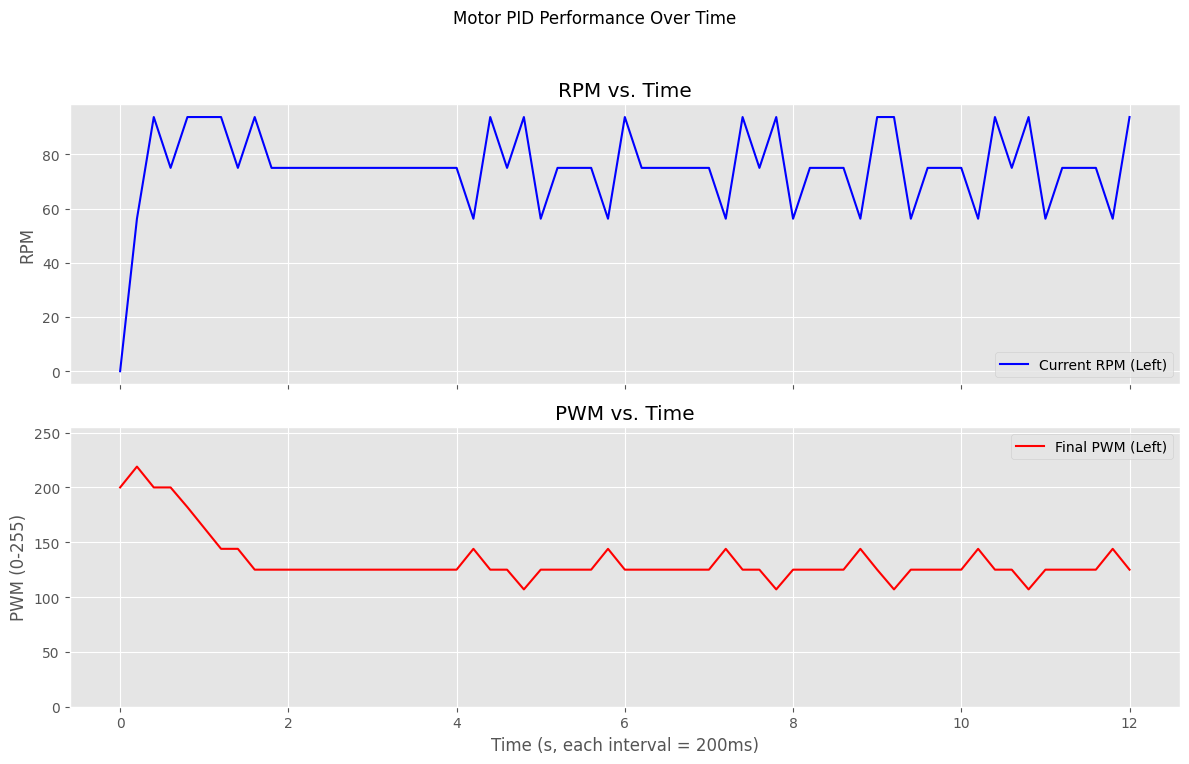

Plot generated with 61 data points.


In [112]:
# Cell 2: Plot the Collected Data

import matplotlib.pyplot as plt

# --- Plot Configuration ---
# IMPORTANT: This TIME_INTERVAL_MS should match the LOOP_INTERVAL_MS you set in your Arduino code (e.g., 200)
ARDUINO_LOOP_INTERVAL_MS = 200
TIME_UNIT_SECONDS = 1.0 # Variable for plotting time unit (e.g., 1.0 for seconds)

# Calculate the actual time step for plotting
time_step_for_plot = ARDUINO_LOOP_INTERVAL_MS / 1000.0 # Convert ms to seconds

# Create scaled timestamps for the X-axis
scaled_timestamps = [i * time_step_for_plot / TIME_UNIT_SECONDS for i in timestamps]


# --- Plot Setup ---
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True) # Two subplots, sharing the X-axis
fig.suptitle('Motor PID Performance Over Time')

# First subplot: RPM vs Time
ax1.plot(scaled_timestamps, current_rpms, 'b-', label='Current RPM (Left)')
ax1.set_ylabel('RPM')
ax1.set_title('RPM vs. Time')
ax1.legend()
ax1.grid(True)

# Second subplot: PWM vs Time
ax2.plot(scaled_timestamps, final_pwms, 'r-', label='Final PWM (Left)')
ax2.set_xlabel(f'Time (s, each interval = {ARDUINO_LOOP_INTERVAL_MS}ms)') # X-axis label reflects actual intervals
ax2.set_ylabel('PWM (0-255)')
ax2.set_title('PWM vs. Time')
ax2.set_ylim(0, 255) # PWM is always between 0 and 255
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print(f"Plot generated with {len(timestamps)} data points.")
if len(timestamps) == 0:
    print("No data was collected. Ensure Cell 1 ran successfully and received data.")

In [24]:
current_rpms = current_rpms[:-7]

In [25]:
final_pwms = final_pwms[:-7]

In [28]:
timestamps = timestamps[:-7]

In [11]:
import serial
import re
import time as py_time # Alias time to avoid potential conflicts

# --- Configuration ---
SERIAL_PORT = 'COM7'  # <--- !!! IMPORTANT: CHANGE THIS TO YOUR ARDUINO'S SERIAL PORT !!!
BAUD_RATE = 9600
# For characterization, we're waiting for Arduino to finish, not collecting a fixed number of points
# MAX_DATA_POINTS is not strictly used in this loop, but good to keep in mind for long runs

# --- Data Storage (these will be global lists) ---
pwms = []
rpms_left = []
rpms_right = []

print(f"--- Starting Data Collection from {SERIAL_PORT} ---")
print("Upload the Arduino characterization sketch, then run this cell.")
print("The script will wait for 'Characterization Complete' from Arduino.")
print("Data will then be available for plotting in the next cell.")

ser = None # Initialize serial object outside try block
try:
    ser = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
    py_time.sleep(2) # Give some time for Arduino to reset and start

    # Clear any initial buffer messages
    while ser.in_waiting > 0:
        ser.readline()

    print("Listening for data...")
    data_started = True
    
    while True: # Loop indefinitely until "Characterization Complete" or interrupted
        if ser.in_waiting > 0:
            line = ser.readline().decode('utf-8', errors='ignore').strip()
            print(f"Received: {line}") # Uncomment for debugging received lines

            if "Characterization Complete" in line:
                print("\n--- Characterization Complete. Stopping data collection. ---")
                break # Exit the loop when characterization is done

            if "PWM,RPM_Left,RPM_Right" in line:
                data_started = True
                print("Header received. Starting data parsing.")
                continue # Skip the header line

            if data_started:
                # Regex to match "PWM,RPM_Left,RPM_Right" format
                match = re.match(r'(\d+),([\d.]+),([\d.]+)', line)
                if match:
                    try:
                        pwm_val = int(match.group(1))
                        rpm_left_val = float(match.group(2))
                        rpm_right_val = float(match.group(3))

                        pwms.append(pwm_val)
                        rpms_left.append(rpm_left_val)
                        rpms_right.append(rpm_right_val)

                        # print(f"Collected: PWM={pwm_val}, RPM_L={rpm_left_val}, RPM_R={rpm_right_val}")
                    except ValueError as e:
                        print(f"Error parsing values from line: '{line}' - {e}")
                elif "Applying PWM:" in line:
                    # Ignore these lines, they are progress updates
                    pass
                else:
                    # print(f"Ignoring unmatched line: {line}") # Debugging for unexpected lines
                    pass
        py_time.sleep(0.01) # Small delay to prevent busy-waiting

except serial.SerialException as e:
    print(f"\nSerial port error: {e}")
    print("Please check if the Arduino is connected, powered on, and the correct port is selected/available.")
    print("If another program (like Arduino Serial Monitor) is using the port, close it.")
except KeyboardInterrupt:
    print("\nData collection interrupted by user.")
finally:
    if ser and ser.is_open:
        ser.close()
        print("Serial port closed.")
    print(f"--- Data Collection Complete. Collected {len(pwms)} data points. ---")

--- Starting Data Collection from COM7 ---
Upload the Arduino characterization sketch, then run this cell.
The script will wait for 'Characterization Complete' from Arduino.
Data will then be available for plotting in the next cell.
Listening for data...
Received: 0,0.00,0.00
Received: Applying PWM: 5
Received: 5,0.00,0.00
Received: Applying PWM: 10
Received: 10,0.00,0.00
Received: Applying PWM: 15
Received: 15,0.00,0.00
Received: Applying PWM: 20
Received: 20,0.00,0.00
Received: Applying PWM: 25
Received: 25,0.00,0.00
Received: Applying PWM: 30
Received: 30,0.00,0.00
Received: Applying PWM: 35
Received: 35,0.00,0.00
Received: Applying PWM: 40
Received: 40,12.50,0.00
Received: Applying PWM: 45
Received: 45,25.00,12.50
Received: Applying PWM: 50
Received: 50,37.50,25.00
Received: Applying PWM: 55
Received: 55,37.50,25.00
Received: Applying PWM: 60
Received: 60,50.00,50.00
Received: Applying PWM: 65
Received: 65,62.50,50.00
Received: Applying PWM: 70
Received: 70,50.00,62.50
Received: Ap

Left Motor Regression: RPM = 0.3980 * PWM + 33.6258
Right Motor Regression: RPM = 0.4028 * PWM + 43.0648


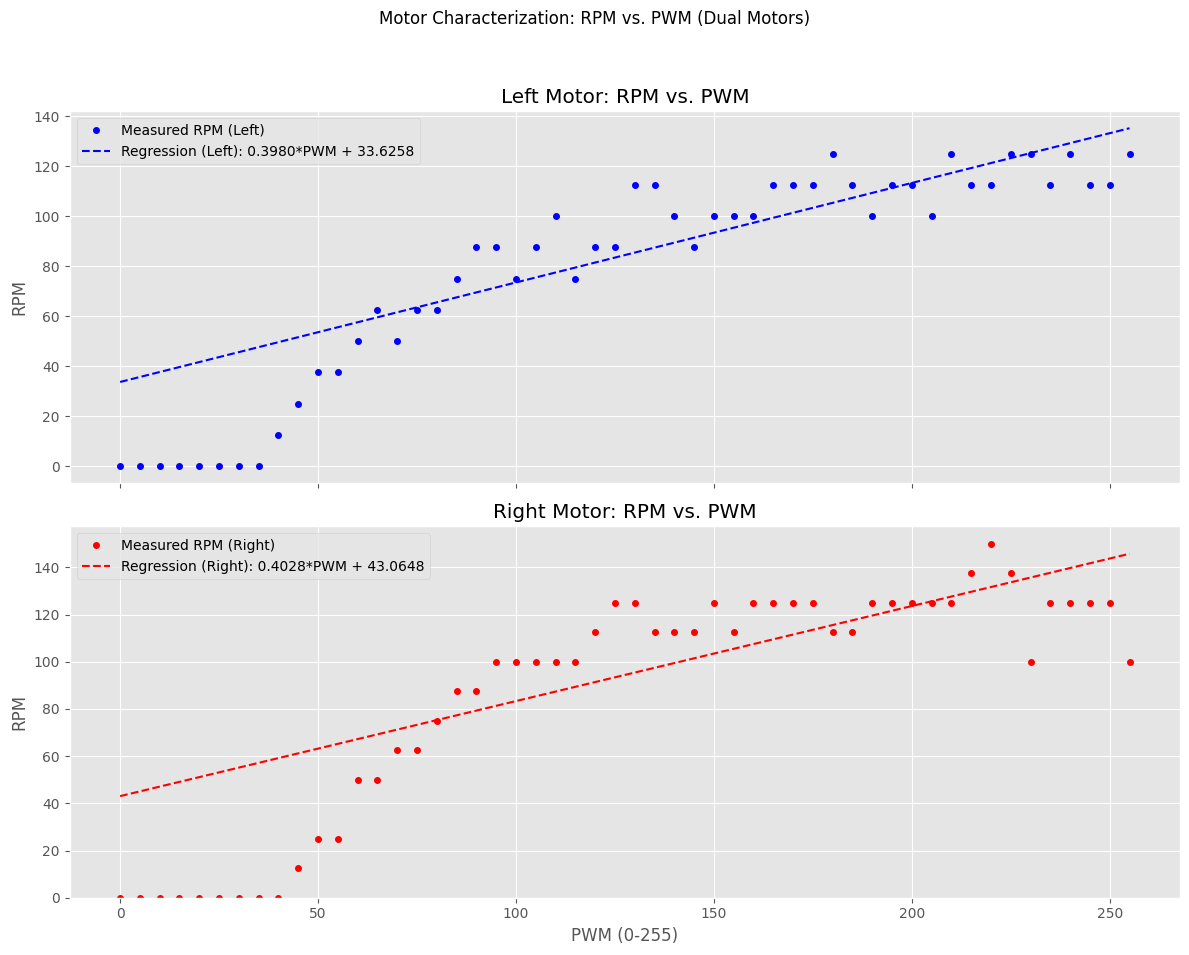

Plot generated with 52 data points.


In [12]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# --- Plot Configuration ---
# Assuming these are for your characterization, not PID loop.
# The x-axis is PWM, so ARDUINO_LOOP_INTERVAL_MS is not directly used for x-axis scaling here.

# --- Plot Setup ---
plt.style.use('ggplot')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True) # Two subplots, sharing the X-axis
fig.suptitle('Motor Characterization: RPM vs. PWM (Dual Motors)')

# Convert lists to NumPy arrays for easier manipulation
pwms_np = np.array(pwms).reshape(-1, 1) # Reshape for sklearn
rpms_left_np = np.array(rpms_left)
rpms_right_np = np.array(rpms_right)

# Filter out 0 RPM values for linear regression (optional, but improves fit for effective range)
# Identify where RPM is non-zero for Left motor
non_zero_rpm_indices_left = rpms_left_np > 0
pwms_filtered_left = pwms_np[non_zero_rpm_indices_left]
rpms_filtered_left = rpms_left_np[non_zero_rpm_indices_left]

# Identify where RPM is non-zero for Right motor
non_zero_rpm_indices_right = rpms_right_np > 0
pwms_filtered_right = pwms_np[non_zero_rpm_indices_right]
rpms_filtered_right = rpms_right_np[non_zero_rpm_indices_right]

# --- Linear Regression for Left Motor ---
if len(pwms_filtered_left) > 1:
    reg_left = LinearRegression()
    reg_left.fit(pwms_filtered_left, rpms_filtered_left)
    slope_left = reg_left.coef_[0]
    intercept_left = reg_left.intercept_
    print(f"Left Motor Regression: RPM = {slope_left:.4f} * PWM + {intercept_left:.4f}")
    # Predict RPM values for plotting the regression line
    predicted_rpms_left = reg_left.predict(pwms_np)
else:
    print("Not enough non-zero RPM data for Left Motor regression.")
    slope_left = 0
    intercept_left = 0
    predicted_rpms_left = np.zeros_like(pwms_np)


# --- Linear Regression for Right Motor ---
if len(pwms_filtered_right) > 1:
    reg_right = LinearRegression()
    reg_right.fit(pwms_filtered_right, rpms_filtered_right)
    slope_right = reg_right.coef_[0]
    intercept_right = reg_right.intercept_
    print(f"Right Motor Regression: RPM = {slope_right:.4f} * PWM + {intercept_right:.4f}")
    # Predict RPM values for plotting the regression line
    predicted_rpms_right = reg_right.predict(pwms_np)
else:
    print("Not enough non-zero RPM data for Right Motor regression.")
    slope_right = 0
    intercept_right = 0
    predicted_rpms_right = np.zeros_like(pwms_np)


# --- Plotting ---

# First subplot: RPM_Left vs PWM
ax1.plot(pwms, rpms_left, 'bo', markersize=4, label='Measured RPM (Left)')
ax1.plot(pwms, predicted_rpms_left, 'b--', label=f'Regression (Left): {slope_left:.4f}*PWM + {intercept_left:.4f}')
ax1.set_ylabel('RPM')
ax1.set_title('Left Motor: RPM vs. PWM')
ax1.legend()
ax1.grid(True)

# Second subplot: RPM_Right vs PWM
ax2.plot(pwms, rpms_right, 'ro', markersize=4, label='Measured RPM (Right)')
ax2.plot(pwms, predicted_rpms_right, 'r--', label=f'Regression (Right): {slope_right:.4f}*PWM + {intercept_right:.4f}')
ax2.set_xlabel('PWM (0-255)')
ax2.set_ylabel('RPM')
ax2.set_title('Right Motor: RPM vs. PWM')
ax2.set_ylim(bottom=0) # Ensure Y-axis starts from 0
ax2.legend()
ax2.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

print(f"Plot generated with {len(pwms)} data points.")
if len(pwms) == 0:
    print("No data was collected. Ensure Arduino is running the correct sketch and Cell 1 ran successfully.")

In [5]:
rpms_left

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 12.5,
 25.0,
 37.5,
 37.5,
 37.5,
 50.0,
 50.0,
 50.0,
 62.5,
 62.5,
 75.0,
 62.5,
 75.0,
 37.5,
 75.0,
 75.0,
 75.0,
 62.5,
 62.5,
 62.5,
 87.5,
 87.5,
 62.5,
 100.0,
 87.5,
 75.0,
 87.5,
 75.0,
 100.0,
 75.0,
 75.0,
 100.0,
 75.0,
 100.0,
 87.5,
 100.0,
 87.5,
 100.0]

In [6]:
rpms_right

[0.0,
 12.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 25.0,
 25.0,
 37.5,
 37.5,
 50.0,
 50.0,
 62.5,
 62.5,
 50.0,
 62.5,
 62.5,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 75.0,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 87.5,
 100.0,
 87.5,
 100.0,
 100.0,
 87.5,
 100.0,
 87.5,
 87.5,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 112.5]

In [7]:
import pandas as pd

In [10]:
df = pd.DataFrame({"pwm": pwms, "rpm_right": rpms_right, "rpm_left": rpms_left})
df.to_csv("Loaded RPM vs PWM.csv")

In [9]:
pwms

[0,
 5,
 0,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195,
 200,
 205,
 210,
 215,
 220,
 225,
 230,
 235,
 240,
 245,
 250,
 255]